In [1]:
# minio client 생성
from minio import Minio

client = Minio(
    "192.168.0.20:8801",  # URI
    access_key="minioadmin",
    secret_key="minioadmin",
    secure=False)

In [2]:
# bucket 내 모든 object 리스트 확인
objects = client.list_objects("stock-dataset", prefix="/", recursive=True)
for obj in objects:
    print(obj.object_name, obj.size)

ETF/kodex200.csv 203637


In [3]:

# client.fget_object params
    # bucket name, object name, download file path
result = client.fget_object("stock-dataset", "ETF/kodex200.csv", "./kodex200.csv")


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
tmp = pd.read_csv("kodex200.csv")
tmp.columns = ["date","open","high","low","close","volume"]
tmp = tmp.sort_values("date").reset_index(drop=True)

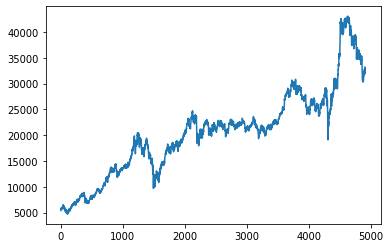

In [6]:
plt.plot(tmp.close)

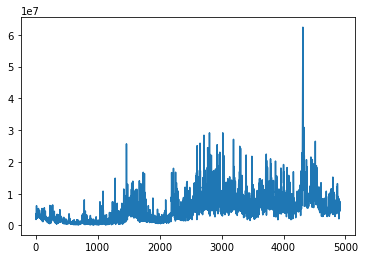

In [13]:
plt.plot(tmp.volume)

In [11]:
tmp["multiple_volume"] = tmp["close"] * tmp["volume"]

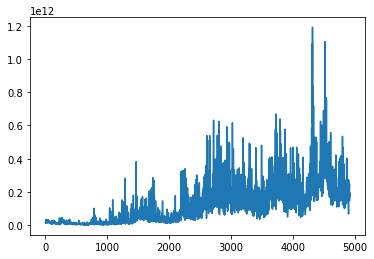

In [15]:
plt.plot(tmp.multiple_volume)